import pandas as pd
df = pd.read_csv('Data/diabetes.csv')
df.head(3)

* Pregnancies : 임신횟수  
* Glucose : 경구 포도당 내성검사 2시간 혈장 포도당 농도 (140미만 정상, 140-199 내당능장애, 200이상 당뇨병)  
* BloodPressure : 이완기 혈압 (mmHg)
* SkinThickness : 팔 삼두근 뒤쪽의 피하지방 측정값 (mm)
* Insulin : 2시간 혈청 인슐린(mu U/mL)
* BMI : 체질량지수(체중(kg) / 키(cm)^2)
* DiabetesPedigreeFunction : 당뇨 직계 가족력
* Age : 나이
* Outcome : 5년이내 당뇨병 발병여부 (0 또는 1)  

#### 데이터 전처리
* pima_1preprocessing 참조

#### 0값 일괄 평균값으로 처리

In [5]:
# # 0값을 검사할 피처명 리스트 객체 설정
# zero_features = ['Glucose', 'BloodPressure','SkinThickness','Insulin','BMI']
# # zero_features 리스트 내부에 저장된 개별 피처들에 대해서 0값을 평균 값으로 대체
# df[zero_features]=df[zero_features].replace(0, df[zero_features].mean())

##### 0값 중앙값으로 Outcome 0, 1에 대해 분리하여 각각 수행

In [6]:
# median 중앙값 찾기
def median_target(var):   
    temp = df[df[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp
# NaN 채워넣기
df.loc[(df['Outcome'] == 0 ) & (df['Glucose'].isnull()), 'Glucose'] = median_target('Glucose')[ median_target('Glucose')['Outcome']==0]['Glucose'].values[0]
df.loc[(df['Outcome'] == 1 ) & (df['Glucose'].isnull()), 'Glucose'] = median_target('Glucose')[ median_target('Glucose')['Outcome']==1]['Glucose'].values[0]
df.loc[(df['Outcome'] == 0 ) & (df['BloodPressure'].isnull()), 'BloodPressure'] = median_target('BloodPressure')[ median_target('BloodPressure')['Outcome']==0]['BloodPressure'].values[0]
df.loc[(df['Outcome'] == 1 ) & (df['BloodPressure'].isnull()), 'BloodPressure'] = median_target('BloodPressure')[ median_target('BloodPressure')['Outcome']==1]['BloodPressure'].values[0]
df.loc[(df['Outcome'] == 0 ) & (df['SkinThickness'].isnull()), 'SkinThickness'] = median_target('SkinThickness')[ median_target('SkinThickness')['Outcome']==0]['SkinThickness'].values[0]
df.loc[(df['Outcome'] == 1 ) & (df['SkinThickness'].isnull()), 'SkinThickness'] = median_target('SkinThickness')[ median_target('SkinThickness')['Outcome']==1]['SkinThickness'].values[0]
df.loc[(df['Outcome'] == 0 ) & (df['Insulin'].isnull()), 'Insulin'] =  median_target('Insulin')[ median_target('Insulin')['Outcome']==0]['Insulin'].values[0]
df.loc[(df['Outcome'] == 1 ) & (df['Insulin'].isnull()), 'Insulin'] = median_target('Insulin')[ median_target('Insulin')['Outcome']==1]['Insulin'].values[0]
df.loc[(df['Outcome'] == 0 ) & (df['BMI'].isnull()), 'BMI'] = median_target('BMI')[ median_target('BMI')['Outcome']==0]['BMI'].values[0]
df.loc[(df['Outcome'] == 1 ) & (df['BMI'].isnull()), 'BMI'] = median_target('BMI')[ median_target('BMI')['Outcome']==1]['BMI'].values[0]

#### OLS RSS 다중회귀 분석

##### 모든 독립변수 feature

In [9]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std

# 상수항 추가?

m = smf.ols(formula = 'Outcome ~ Pregnancies + Glucose + BloodPressure + SkinThickness + Insulin + BMI + DiabetesPedigreeFunction + Age',data=df).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Outcome   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     41.29
Date:                Thu, 15 Oct 2020   Prob (F-statistic):           7.36e-55
Time:                        01:38:01   Log-Likelihood:                -381.91
No. Observations:                 768   AIC:                             781.8
Df Residuals:                     759   BIC:                             823.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -0.8539      0.085     -9.989      0.000      -1.022      -0.686
Pregnancies                  0.0206      0.005      4.014      0.000       0.011       0.031
Glucose                      0.0059      0.001     11.493      0.000       0.005       0.007
BloodPressure               -0.0023      0.001     -2.873      0.004      -0.004      -0.001
SkinThickness                0.0002      0.001      0.139      0.890      -0.002       0.002
Insulin                     -0.0002      0.000     -1.205      0.229      -0.000       0.000
BMI                          0.0132      0.002      6.344      0.000       0.009       0.017
DiabetesPedigreeFunction     0.1472      0.045      3.268      0.001       0.059       0.236
Age                          0.0026      0.002      1.693      0.091      -0.000       0.006
==============================================================================
Omnibus:                       41.539   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.183
Skew:                           0.395   Prob(JB):                     1.69e-07
Kurtosis:                       2.408   Cond. No.                     1.10e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
##### 해석
* 1. 전체모형
    + R2 score 보아 설명력이 낮다,  F 0.05  ok
* 2. 개별 독립변수 feature
    + SkinThickness Insulin 유의하지 않다
    + BloodPressure 유의 : 데이터 mean()값으로 하였을 경우  유의하지 않았음
* 3. 모형의 타당성 검증
    + 정규화 : ok : Prob(Omnibus):	0.000  Prob(JB):	1.69e-07
    + DW : ok
    + Cond. NO. : warning 2

SyntaxError: invalid syntax (<ipython-input-10-934d8f52aaf0>, line 2)

### Outcome과 상관관계 높은 변수

In [11]:
df_=df.drop(['Outcome'], axis=1)
target = df[['Outcome']]
x_data = df[['Glucose','BloodPressure','BMI', 'Age' ]]
x_data1 = sm.add_constant(x_data, has_constant="add")
m1 = sm.OLS(target, x_data1).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Outcome   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     73.69
Date:                Thu, 15 Oct 2020   Prob (F-statistic):           8.17e-53
Time:                        01:38:03   Log-Likelihood:                -395.23
No. Observations:                 768   AIC:                             800.5
Df Residuals:                     763   BIC:                             823.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.8376      0.085     -9.857      0.000      -1.004      -0.671
Glucose           0.0058      0.000     11.970      0.000       0.005       0.007
BloodPressure    -0.0023      0.001     -2.864      0.004      -0.004      -0.001
BMI               0.0138      0.002      6.947      0.000       0.010       0.018
Age               0.0061      0.001      4.576      0.000       0.003       0.009
==============================================================================
Omnibus:                       51.166   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.209
Skew:                           0.422   Prob(JB):                     1.37e-08
Kurtosis:                       2.353   Cond. No.                         869.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
### Cond. NO. 다중공선성 파악 VIF
* 독립변수와 종속변수하고는 상관관계가 존재해야 하나, 독립변수끼리는 상관관계가 있어서는 안됨
* 독립변수간 상관관계 : 산점도 그래프,heapmap 등으로 확인가능 ==> profiling에서 분석해줌
* VIF는 variance inflation factor의 줄임말로, 다중공선성을 확인할 때 쓰는 지표 중 하나다.  
* variance inflation factor는 말그대로 "분산팽창요인"이다. 보통은 VIF가 10보다 크면 다중공선성이 있다고 판단한다. 5이상 유의 
* 하지만, 다른 과정을 함께 거쳐주는 것이 다중공선성 문제 확인의 신뢰성을 높인다.

SyntaxError: invalid syntax (<ipython-input-12-90f8bda560c4>, line 2)

#### target class 제외하고 VIF 구하기

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline
# y, X = dmatrices('price ~ area + bedrooms + bathrooms', df, return_type = 'dataframe')

# vif = pd.DataFrame()
# vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
# vif["features"] = X.columns 
# vif
df_vlf = df.iloc[:,:-1]
# print(df_vlf)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_vlf.values, i) for i in range(df_vlf.shape[1])]
vif["features"] = df_vlf.columns
vif

,VIF Factor,features
0,3.275748,Pregnancies
1,16.725078,Glucose
2,14.619512,BloodPressure
3,4.008696,SkinThickness
4,2.063689,Insulin
5,18.408884,BMI
6,3.195626,DiabetesPedigreeFunction
7,13.492985,Age


#### Outcome과 상관관계가 낮은 변수들

In [14]:
x_data = df[['Pregnancies','SkinThickness','Insulin', 'DiabetesPedigreeFunction' ]]
x_data2 = sm.add_constant(x_data, has_constant="add")
m2 = sm.OLS(target, x_data2).fit()
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Outcome   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     20.21
Date:                Thu, 15 Oct 2020   Prob (F-statistic):           7.74e-16
Time:                        01:38:09   Log-Likelihood:                -481.99
No. Observations:                 768   AIC:                             974.0
Df Residuals:                     763   BIC:                             997.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.0659      0.039      1.674      0.094      -0.011       0.143
Pregnancies                  0.0335      0.005      6.847      0.000       0.024       0.043
SkinThickness                0.0005      0.001      0.421      0.674      -0.002       0.003
Insulin                      0.0005      0.000      2.893      0.004       0.000       0.001
DiabetesPedigreeFunction     0.2276      0.051      4.483      0.000       0.128       0.327
==============================================================================
Omnibus:                      626.813   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               91.019
Skew:                           0.587   Prob(JB):                     1.72e-20
Kurtosis:                       1.789   Cond. No.                         487.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
### 도메인정보
+ 당뇨는 포도당농도가 직접적 연관, 따라서 Glucose부터 시작

SyntaxError: invalid syntax (<ipython-input-15-2c1f07604282>, line 2)

In [16]:
df_=df.drop(['Outcome'], axis=1)
target = df[['Outcome']]
x_data = df[['Glucose' ]]
x_data3 = sm.add_constant(x_data, has_constant="add")
m3 = sm.OLS(target, x_data3).fit()
m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Outcome   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     213.2
Date:                Thu, 15 Oct 2020   Prob (F-statistic):           8.94e-43
Time:                        01:38:10   Log-Likelihood:                -426.39
No. Observations:                 768   AIC:                             856.8
Df Residuals:                     766   BIC:                             866.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4925      0.060     -8.262      0.000      -0.610      -0.375
Glucose        0.0070      0.000     14.600      0.000       0.006       0.008
==============================================================================
Omnibus:                       62.933   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.855
Skew:                           0.570   Prob(JB):                     2.02e-12
Kurtosis:                       2.380   Cond. No.                         489.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
x_data = df[['Glucose', 'Pregnancies']]
x_data4 = sm.add_constant(x_data, has_constant="add")
m5 = sm.OLS(target, x_data4).fit()
m5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Outcome   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     123.6
Date:                Thu, 15 Oct 2020   Prob (F-statistic):           3.06e-47
Time:                        01:38:10   Log-Likelihood:                -413.14
No. Observations:                 768   AIC:                             832.3
Df Residuals:                     765   BIC:                             846.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.5435      0.059     -9.142      0.000      -0.660      -0.427
Glucose         0.0066      0.000     14.049      0.000       0.006       0.008
Pregnancies     0.0232      0.004      5.182      0.000       0.014       0.032
==============================================================================
Omnibus:                       52.634   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.979
Skew:                           0.516   Prob(JB):                     1.71e-10
Kurtosis:                       2.416   Cond. No.                         497.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
x_data = df[['Glucose', 'Pregnancies', 'BloodPressure']]
x_data5 = sm.add_constant(x_data, has_constant="add")
m5 = sm.OLS(target, x_data5).fit()
m5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Outcome   R-squared:                       0.245
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     82.61
Date:                Thu, 15 Oct 2020   Prob (F-statistic):           2.70e-46
Time:                        01:38:11   Log-Likelihood:                -412.78
No. Observations:                 768   AIC:                             833.6
Df Residuals:                     764   BIC:                             852.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.5059      0.074     -6.809      0.000      -0.652      -0.360
Glucose           0.0067      0.000     14.030      0.000       0.006       0.008
Pregnancies       0.0237      0.005      5.246      0.000       0.015       0.033
BloodPressure    -0.0007      0.001     -0.846      0.398      -0.002       0.001
==============================================================================
Omnibus:                       51.777   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.281
Skew:                           0.522   Prob(JB):                     1.47e-10
Kurtosis:                       2.430   Cond. No.                         707.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
x_data = df[['Glucose', 'Pregnancies', 'BloodPressure', 'SkinThickness']]
x_data6 = sm.add_constant(x_data, has_constant="add")
m6 = sm.OLS(target, x_data6).fit()
m6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Outcome   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     63.54
Date:                Thu, 15 Oct 2020   Prob (F-statistic):           2.22e-46
Time:                        01:38:12   Log-Likelihood:                -410.25
No. Observations:                 768   AIC:                             830.5
Df Residuals:                     763   BIC:                             853.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.5230      0.074     -7.021      0.000      -0.669      -0.377
Glucose           0.0067      0.000     13.967      0.000       0.006       0.008
Pregnancies       0.0249      0.005      5.488      0.000       0.016       0.034
BloodPressure    -0.0011      0.001     -1.311      0.190      -0.003       0.001
SkinThickness     0.0022      0.001      2.244      0.025       0.000       0.004
==============================================================================
Omnibus:                       53.721   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.570
Skew:                           0.518   Prob(JB):                     1.27e-10
Kurtosis:                       2.409   Cond. No.                         718.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
print(m6.rsquared)
print(m6.fvalue)
# print(m6.params.Intercept)
# print(m6.params.lstat)

0.24988178467225453
63.54325151990414


## 다중회귀 모델로는 답이 안나옴
* 종속변수가 0, 1 이므로 
* target이 0,1이므로 로지스틱회귀분석 모델로 변환코자 함

### 회귀 랩 보스턴 집값 :  잔차에 대한 그래프 있음
+ http://www.science.smith.edu/~jcrouser/SDS293/labs/lab2-py.html

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
3  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

    black  lstat  medv  
1  396.90   4.98  24.0  
2  396.90   9.14  21.6  
3  392.83   4.03  34.7  
4  394.63   2.94  33.4  
5  396.90   5.33  36.2  
                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Thu, 15 Oct 2020   Prob (F-stati

C:\Users\spiso\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


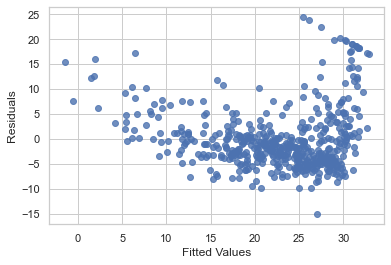

In [60]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

df = pd.read_csv('Data/Boston.csv', index_col=0)
print(df.head())

lm = sm.OLS.from_formula('medv ~ lstat', df)
result = lm.fit()

print(result.summary())

fitted_values = pd.Series(result.fittedvalues, name="Fitted Values")
residuals = pd.Series(result.resid, name="Residuals")
sns.regplot(fitted_values, residuals, fit_reg=False)

In [45]:
result.rsquared, result.fvalue, result.params.Intercept, result.params.lstat

(0.5441462975864797, 601.6178711098953, 34.5538408793831, -0.950049353757991)

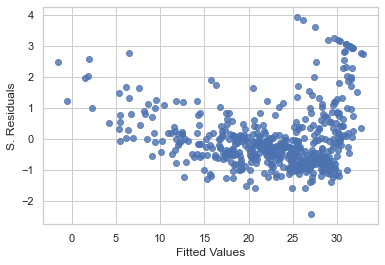

In [43]:
s_residuals = pd.Series(result.resid_pearson, name="S. Residuals")
sns.regplot(fitted_values, s_residuals,  fit_reg=False)

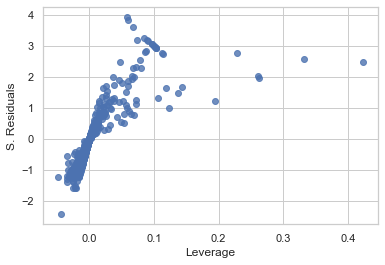

In [44]:
from statsmodels.stats.outliers_influence import OLSInfluence
leverage = pd.Series(OLSInfluence(result).influence, name = "Leverage")
sns.regplot(leverage, s_residuals,  fit_reg=False)

In [47]:
new = pd.DataFrame([[1, 5], [1, 10], [1, 15]], columns=['Intercept', 'lstat'])
print(new)
result.predict(new)

   Intercept  lstat
0          1      5
1          1     10
2          1     15


0    29.803594
1    25.053347
2    20.303101
dtype: float64

In [49]:
def predict(res, new):
    
    # Get the predicted values
    fit = pd.DataFrame(res.predict(new), columns=['fit'])
    
    # Get the confidence interval for the model (and rename the columns to something a bit more useful)
    ci = res.conf_int().rename(columns={0: 'lower', 1: 'upper'})
    
    # Now a little bit of matrix multiplication to get the confidence intervals for the predictions
    ci = ci.T.dot(new.T).T
    
    # And finally wrap up the confidence intervals with the predicted values
    return pd.concat([fit, ci], axis=1)

In [50]:
predict(result, new)

,fit,lower,upper
0,29.803594,28.317716,31.289472
1,25.053347,23.186975,26.919720
2,20.303101,18.056234,22.549967


C:\Users\spiso\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


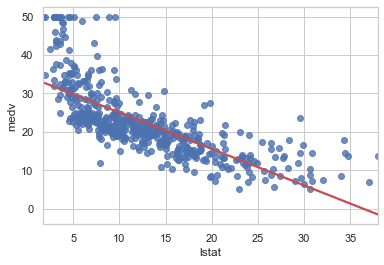

In [51]:
import seaborn as sns
sns.regplot('lstat', 'medv', df, line_kws = {"color":"r"}, ci=None)

C:\Users\spiso\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


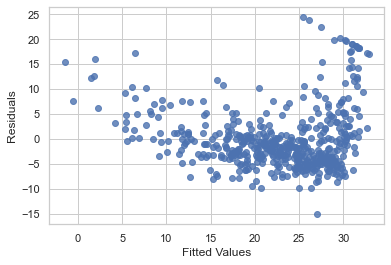

In [52]:
fitted_values = pd.Series(result.fittedvalues, name="Fitted Values")
residuals = pd.Series(result.resid, name="Residuals")
sns.regplot(fitted_values, residuals, fit_reg=False)

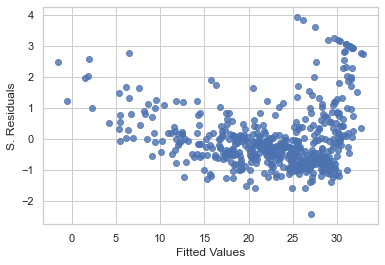

In [53]:
s_residuals = pd.Series(result.resid_pearson, name="S. Residuals")
sns.regplot(fitted_values, s_residuals,  fit_reg=False)

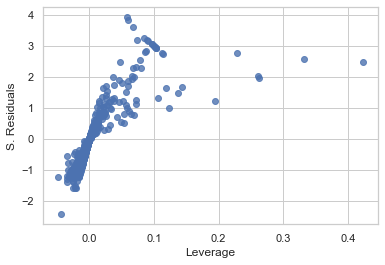

In [56]:
from statsmodels.stats.outliers_influence import OLSInfluence
leverage = pd.Series(OLSInfluence(result).influence, name = "Leverage")
sns.regplot(leverage, s_residuals,  fit_reg=False)

In [57]:
####  Multiple Linear Regression

In [59]:
model = sm.OLS.from_formula('medv ~ lstat + age', df)
result = model.fit()
print (result.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Thu, 15 Oct 2020   Prob (F-statistic):           2.98e-88
Time:                        02:28:37   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.2228      0.731     45.458      0.0

In [62]:
# All columns (except medv, which is our response)
model = sm.OLS.from_formula('medv ~ ' + '+'.join(df.columns.difference(['medv'])), df)
result = model.fit()
print (result.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 15 Oct 2020   Prob (F-statistic):          6.72e-135
Time:                        02:29:22   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.0

In [63]:
# All columns (except medv)
model = sm.OLS.from_formula('medv ~ ' + '+'.join(df.columns.difference(['medv', 'age', 'indus'])), df)
result = model.fit()
print (result.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Thu, 15 Oct 2020   Prob (F-statistic):          5.54e-137
Time:                        02:29:42   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.3411      5.067      7.171      0.0

In [ ]:
#### Interaction Terms

In [66]:
print ( sm.OLS.from_formula('medv ~ lstat*age', df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Thu, 15 Oct 2020   Prob (F-statistic):           4.86e-88
Time:                        02:30:18   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.0

In [ ]:
####  Non-linear Transformations of the Predictors

In [67]:
lm.fit2 = sm.OLS.from_formula('medv ~ lstat + np.square(lstat)', df).fit()
print (lm.fit2.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Thu, 15 Oct 2020   Prob (F-statistic):          1.56e-112
Time:                        02:31:46   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           42.8620      0.872  

In [69]:
lm.fit = sm.OLS.from_formula('medv ~ lstat', df).fit()
print ( sm.stats.anova_lm(lm.fit, lm.fit2))

   df_resid           ssr  df_diff     ss_diff           F        Pr(>F)
0     504.0  19472.381418      0.0         NaN         NaN           NaN
1     503.0  15347.243158      1.0  4125.13826  135.199822  7.630116e-28


C:\Users\spiso\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [70]:
sm.OLS.from_formula('medv ~ ' + '+'.join(['np.power(lstat,' + str(i) + ')' for i in range(1,6)]), df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     214.2
Date:                Thu, 15 Oct 2020   Prob (F-statistic):          8.73e-122
Time:                        02:32:49   Log-Likelihood:                -1550.6
No. Observations:                 506   AIC:                             3113.
Df Residuals:                     500   BIC:                             3139.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             67.6997      3.604     18.783      0.000      60.618      74.781
np.power(lstat, 1)   -11.9911      1.526     -7.859      0.000     -14.989      -8.994
np.power(lstat, 2)     1.2728      0.223      5.703      0.000       0.834       1.711
np.power(lstat, 3)    -0.0683      0.014     -4.747      0.000      -0.097      -0.040
np.power(lstat, 4)     0.0017      0.000      4.143      0.000       0.001       0.003
np.power(lstat, 5) -1.632e-05   4.42e-06     -3.692      0.000    -2.5e-05   -7.63e-06
==============================================================================
Omnibus:                      144.085   Durbin-Watson:                   0.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              494.545
Skew:                           1.292   Prob(JB):                    4.08e-108
Kurtosis:                       7.096   Cond. No.                     1.37e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [71]:
sm.OLS.from_formula('medv ~ np.log(rm)', df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     389.3
Date:                Thu, 15 Oct 2020   Prob (F-statistic):           1.22e-64
Time:                        02:32:58   Log-Likelihood:                -1695.4
No. Observations:                 506   AIC:                             3395.
Df Residuals:                     504   BIC:                             3403.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -76.4878      5.028    -15.213      0.000     -86.366     -66.610
np.log(rm)    54.0546      2.739     19.732      0.000      48.672      59.437
==============================================================================
Omnibus:                      117.102   Durbin-Watson:                   0.681
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              584.336
Skew:                           0.916   Prob(JB):                    1.30e-127
Kurtosis:                       7.936   Cond. No.                         38.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 돌아가서 Pima logit

#### 전체 변수

In [20]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

m11 = smf.logit(formula='Outcome ~ Pregnancies + Glucose + BloodPressure + SkinThickness + Insulin + BMI + DiabetesPedigreeFunction + Age',data=df).fit()
m11.summary()

Optimization terminated successfully.
         Current function value: 0.470993
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      759
Method:                           MLE   Df Model:                            8
Date:                Thu, 15 Oct 2020   Pseudo R-squ.:                  0.2718
Time:                        01:38:34   Log-Likelihood:                -361.72
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 9.652e-54
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -8.4047      0.717    -11.728      0.000      -9.809      -7.000
Pregnancies                  0.1232      0.032      3.840      0.000       0.060       0.186
Glucose                      0.0352      0.004      9.481      0.000       0.028       0.042
BloodPressure               -0.0133      0.005     -2.540      0.011      -0.024      -0.003
SkinThickness                0.0006      0.007      0.090      0.929      -0.013       0.014
Insulin                     -0.0012      0.001     -1.322      0.186      -0.003       0.001
BMI                          0.0897      0.015      5.945      0.000       0.060       0.119
DiabetesPedigreeFunction     0.9452      0.299      3.160      0.002       0.359       1.531
Age                          0.0149      0.009      1.593      0.111      -0.003       0.033
============================================================================================
"""

In [ ]:
####  결과해석
* 전체모형 : R2, log-likelihood, p-vlaue
* 개별 독립변수 : 0.05기준으로 BloodPressure SkinThickness Insulin Age 유의하지 않다
* 모델의 타당성검토에 대한 항목이 없다
  + 다중회귀에서는 : 전체모형의 등분산성(F-score), 정규성, 오차항(잔차)의 무상관성(DW), 다중공선성(독립변수끼리)

#### SkinThickness 제거

In [21]:
m12 = smf.logit(formula='Outcome ~ Pregnancies + Glucose + BloodPressure +Insulin + BMI + DiabetesPedigreeFunction + Age',data=df).fit()
m12.summary()

Optimization terminated successfully.
         Current function value: 0.470998
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      760
Method:                           MLE   Df Model:                            7
Date:                Thu, 15 Oct 2020   Pseudo R-squ.:                  0.2718
Time:                        01:38:46   Log-Likelihood:                -361.73
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 1.500e-54
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -8.4051      0.717    -11.727      0.000      -9.810      -7.000
Pregnancies                  0.1232      0.032      3.841      0.000       0.060       0.186
Glucose                      0.0351      0.004      9.587      0.000       0.028       0.042
BloodPressure               -0.0132      0.005     -2.564      0.010      -0.023      -0.003
Insulin                     -0.0012      0.001     -1.421      0.155      -0.003       0.000
BMI                          0.0901      0.014      6.229      0.000       0.062       0.118
DiabetesPedigreeFunction     0.9476      0.298      3.180      0.001       0.364       1.532
Age                          0.0148      0.009      1.592      0.111      -0.003       0.033
============================================================================================
"""

#### Insulin 제거

In [22]:
m13 = smf.logit(formula='Outcome ~ Pregnancies + Glucose + BloodPressure + BMI + DiabetesPedigreeFunction + Age',data=df).fit()
m13.summary()

Optimization terminated successfully.
         Current function value: 0.472306
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      761
Method:                           MLE   Df Model:                            6
Date:                Thu, 15 Oct 2020   Pseudo R-squ.:                  0.2698
Time:                        01:38:47   Log-Likelihood:                -362.73
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 5.747e-55
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -8.2398      0.702    -11.738      0.000      -9.616      -6.864
Pregnancies                  0.1249      0.032      3.907      0.000       0.062       0.188
Glucose                      0.0335      0.003      9.736      0.000       0.027       0.040
BloodPressure               -0.0135      0.005     -2.637      0.008      -0.024      -0.003
BMI                          0.0877      0.014      6.145      0.000       0.060       0.116
DiabetesPedigreeFunction     0.8962      0.295      3.039      0.002       0.318       1.474
Age                          0.0163      0.009      1.767      0.077      -0.002       0.034
============================================================================================
"""

In [ ]:
### 결과해석
+ Age가 0.077 이기하나 여타 독립변수들은 모두 유의함

In [ ]:
#### Age 제거

In [23]:
m14 = smf.logit(formula='Outcome ~ Pregnancies + Glucose + BloodPressure + BMI + DiabetesPedigreeFunction',data=df).fit()
m14.summary()

Optimization terminated successfully.
         Current function value: 0.474323
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      762
Method:                           MLE   Df Model:                            5
Date:                Thu, 15 Oct 2020   Pseudo R-squ.:                  0.2667
Time:                        01:38:55   Log-Likelihood:                -364.28
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 3.442e-55
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -7.9550      0.676    -11.771      0.000      -9.280      -6.630
Pregnancies                  0.1535      0.028      5.514      0.000       0.099       0.208
Glucose                      0.0347      0.003     10.213      0.000       0.028       0.041
BloodPressure               -0.0120      0.005     -2.387      0.017      -0.022      -0.002
BMI                          0.0848      0.014      6.006      0.000       0.057       0.113
DiabetesPedigreeFunction     0.9106      0.294      3.097      0.002       0.334       1.487
============================================================================================
"""

In [ ]:
#### 독립변수들이 모두 유의함

In [36]:
# 없음
# print(m14.rsquared)
# print(m14.fvalue)
# print(m14.params.Intercept)
# print(m14.params.lstat)

## 훈련된 모델에 대한 성능평가 metric

In [24]:
pred = m14.predict() # 예측을 하니 확률이 반환
print(pred[:])

[0.65750317 0.04428403 0.80775101 0.04863693 0.88621766 0.15434062
 0.07338081 0.66423427 0.74467399 0.03435068 0.21931854 0.90261329
 0.740395   0.71997493 0.60454102 0.39436186 0.38063727 0.21110126
 0.32037786 0.22454388 0.44788647 0.27926892 0.93206309 0.32956215
 0.71034042 0.47419142 0.70642564 0.05622505 0.54677424 0.26163173
 0.3188313  0.62821766 0.05764855 0.04349012 0.42050402 0.17136225
 0.69053231 0.36484292 0.16156864 0.51364195 0.75148872 0.68231952
 0.10231843 0.92690883 0.61153632 0.94146272 0.40595977 0.04233757
 0.3839027  0.04909365 0.04313224 0.08553323 0.07251253 0.82867282
 0.75458536 0.02424952 0.90145636 0.33189777 0.76459756 0.19682581
 0.01143163 0.51370329 0.02294066 0.33931533 0.33080767 0.11921459
 0.1546969  0.35822167 0.03440435 0.3367595  0.19874593 0.41628908
 0.82336585 0.32854897 0.05271122 0.00211844 0.07264977 0.22716418
 0.62148188 0.10355072 0.11118289 0.00675698 0.14723991 0.05058114
 0.64803269 0.20752    0.52912342 0.19192093 0.81861785 0.0750

In [25]:
# error
# print(np.column_stack((df.as_matrix(columns = ["Outcome"]).flatten(), 
#                        m14.model.endog)))
# predictions_nominal = [ "Up" if x < 0.5 else "Down" for x in pred]
# from sklearn.metrics import confusion_matrix, classification_report
# print(confusion_matrix(df["Outcome"], 
#                        predictions_nominal))
# print(classification_report(df["Outcome"], 
#                             predictions_nominal, 
#                             digits = 3))

## 잔차(residual) Linear Regression Diagnostic in Python with StatsModels
Lineearity  
Independence (This is probably more serious for time series. I’ll pass it for now)  
Normality  
Equal variance (or homoscedasticity)  

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     37.58
Date:                Thu, 15 Oct 2020   Prob (F-statistic):           1.35e-09
Time:                        01:45:41   Log-Likelihood:                -874.04
No. Observations:                 834   AIC:                             1752.
Df Residuals:                     832   BIC:                             1762.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2841      0.048      5.907      0.0

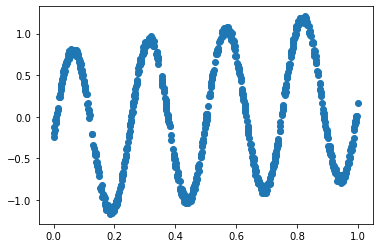

In [29]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

#generate data
x = np.random.rand(1000)
y =np.sin( x*25)+0.1*np.random.rand(1000)

# Make some as NAN
y[np.random.choice(np.arange(1000), size=100)]= np.nan
x[np.random.choice(np.arange(1000), size=80)]= np.nan


# fit model
model = sm.OLS(y, sm.add_constant(x) ,missing='drop').fit()
print(model.summary())

# plot 
plt.scatter(model.model.exog[:,1], model.resid)
plt.show()

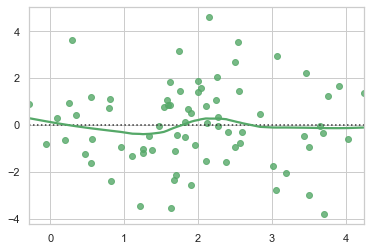

In [30]:
import numpy as np
import seaborn as sns
sns.set_theme(style="whitegrid")

# Make an example dataset with y ~ x
rs = np.random.RandomState(7)
x = rs.normal(2, 1, 75)
y = 2 + 1.5 * x + rs.normal(0, 2, 75)

# Plot the residuals after fitting a linear model
sns.residplot(x=x, y=y, lowess=True, color="g")

AttributeError: 'LogitResults' object has no attribute 'resid'

In [ ]:
# ['Pregnancies','Glucose', 'BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction', 'Age', 'Outcome' ]